**Little questions that I would have asked if we had an oral exam:**
(meaning that you shouldn't read or google or think for more than 5 seconds to answer them)

 - How do you create markdown cell in Jupyter? (with keyboard commands)
 - How do you add a cell above the current one in Jupyter (with keyboard command)? 
 - What does it mean that variables are dynamically typed in python?
 - What's the difference between python and Fortran integers?
 - Explain the difference between lists, sets and tuples in python.
 - What does negative index mean when accessing list elements?
 - How do you print the first N elements of a list?
 - How do you print every Nth element of a list?
 - How do you print the reverse list?
 - Give an example of a list comprehension.
 - Give an example of cell and line magic commands in Jupyter.
 - What are keyword function arguments in python and what is their advantage?
 - Why shouldn't you do from numpy import *?
 - What is the advantage of using numpy arrays over lists? What are the dangers?
 - What's the purpose of __str__ method in a python class?
 - How do you make "+" operator work for your class?
 - What package can you use in python for symbolic calculations?



## Estimated max time needed: 6 hours  

### **Problem1:**

Write a function that calculates the first N [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [2]:
# jacobian 
def get_fibonacci(n):
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    
    fib = [0, 1]
    for i in range(2, n):
        next_val = fib[-1] + fib[-2]
        fib.append(next_val)
        
    return fib


n_terms = 10
result = get_fibonacci(n_terms)
print(f"The first {n_terms} Fibonacci numbers: {result}")


The first 10 Fibonacci numbers: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


### **Problem2:**

Generate random data for 2D points coordinates. Write a function that plots them with different colors for each 90 degree section with the origin in the center. This problem should be coded as a class, i.e. you should be able to execute the code:

```
pr=Problem2()
pr.generate()
pr.display()
```

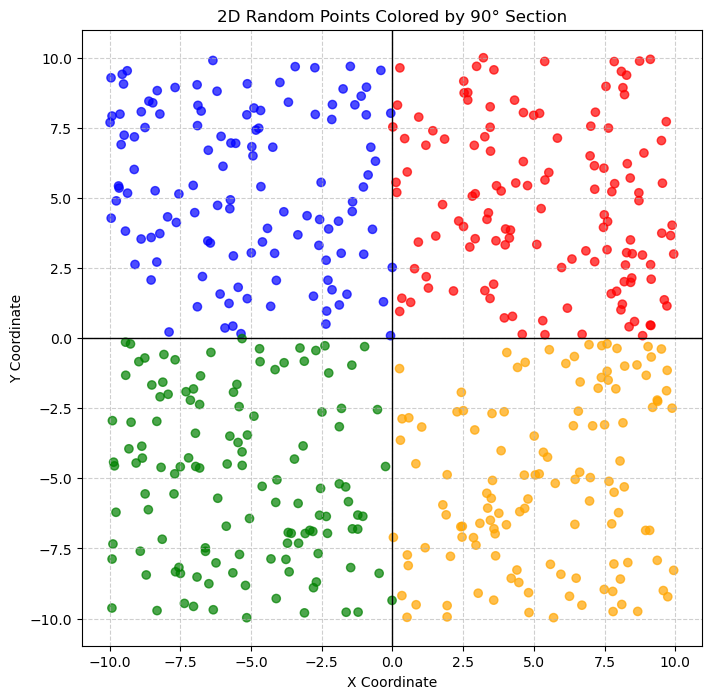

In [3]:
# plot of 2d 
import numpy as np
import matplotlib.pyplot as plt

class Problem2:
    def __init__(self, num_points=500):
        self.num_points = num_points
        self.x = None
        self.y = None

    def generate(self):
        self.x = np.random.uniform(-10, 10, self.num_points)
        self.y = np.random.uniform(-10, 10, self.num_points)

    def display(self):
        if self.x is None or self.y is None:
            print("Error: No data generated. Call .generate() first.")
            return

        colors = []
        for xi, yi in zip(self.x, self.y):
            if xi >= 0 and yi >= 0:
                colors.append('red')     
            elif xi < 0 and yi >= 0:
                colors.append('blue')   
            elif xi < 0 and yi < 0:
                colors.append('green')   
            else:
                colors.append('orange')  


        plt.figure(figsize=(8, 8))
        plt.scatter(self.x, self.y, c=colors, alpha=0.7)
        
        plt.axhline(0, color='black', linewidth=1)
        plt.axvline(0, color='black', linewidth=1)
        
        plt.title("2D Random Points Colored by 90° Section")
        plt.xlabel("X Coordinate")
        plt.ylabel("Y Coordinate")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()


pr = Problem2()
pr.generate()
pr.display()


### **Problem3:**

Write a decorator that calls a function twice.

In [5]:
def call_twice(func):
    def wrapper(*args, **kwargs):
        
        result1 = func(*args, **kwargs)
      
        result2 = func(*args, **kwargs)
        
        return result2
    return wrapper


@call_twice
def greet(name):
    print(f"Hello, {name}!")

greet("Alice")


Hello, Alice!
Hello, Alice!


### **Problem4:**

Use sympy to solve the equation `d^2y(x)/dx^2 + 9y(x)+x=0`
Check that it's correct (still using sympy). Hint: you can access the right hand side of solution expression with `.rhs`.

Then set the constants equal to 1 and integrate the obtained function numerically using scipy over the interval [0,10]
Hint: you can use symply's lambdify function to turn sympy's expression into a function you can use later for scipy.


In [11]:
# differential equation 
import sympy as sp
x = sp.symbols('x')
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')
ode = sp.Eq(y(x).diff(x, x) + 9*y(x) + x, 0)
sol = sp.dsolve(ode, y(x))
sol_rhs = sol.rhs  
check = sp.simplify(ode.lhs.subs(y(x), sol_rhs).doit())

print(f"Solution: {sol}")
print(f"Verification (LHS = 0?): {check}")


Solution: Eq(y(x), C1*sin(3*x) + C2*cos(3*x) - x/9)
Verification (LHS = 0?): 0


In [12]:
# ode with c = 1 
import sympy as sp
x = sp.symbols('x')
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')
ode = sp.Eq(y(x).diff(x, x) + 9*y(x) + x, 1)
sol = sp.dsolve(ode, y(x))
sol_rhs = sol.rhs  
check = sp.simplify(ode.lhs.subs(y(x), sol_rhs).doit())

print(f"Solution: {sol}")
print(f"Verification (LHS = 0?): {check}")

Solution: Eq(y(x), C1*sin(3*x) + C2*cos(3*x) - x/9 + 1/9)
Verification (LHS = 0?): 1


In [18]:
# sympy to generate the integral
import sympy as sp 
import numpy as np 
x = sp.symbols('x')
sp.Integral(sp.sin(3*x) + sp.cos(3*x)+ x/9 - sp.Rational(1,9),(x, 0, 10))

Integral(x/9 + sin(3*x) + cos(3*x) - 1/9, (x, 0, 10))

In [13]:
# integrate the solution over [0,10]
from scipy.integrate import quad 
import numpy as np 
def integrand(x):
    return (np.sin(3*x) + np.cos(3*x) - x/9 + 1/9)

ans = quad(integrand, 0, 10)
print(ans) 

(-4.491872135771258, 1.1355631693246596e-13)


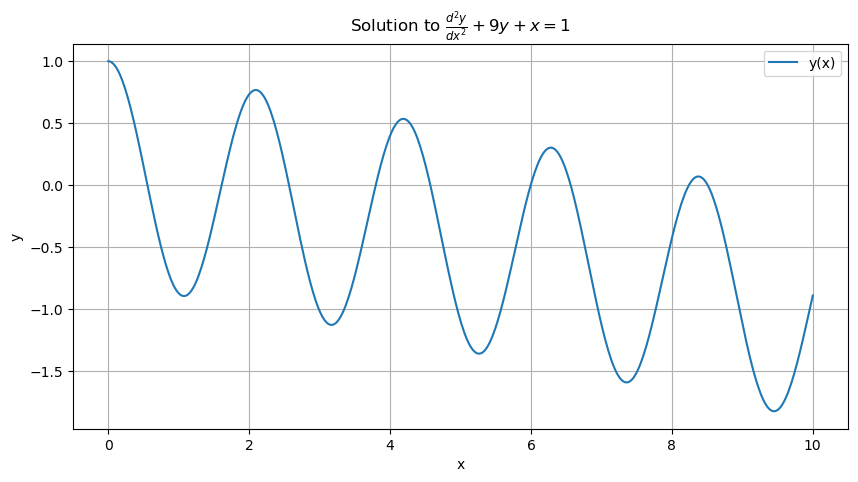

In [10]:
# diff equation using scipy to check the answer  
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def ode_system(x, y_vec):
    y, dy_dx = y_vec
    
    d1 = dy_dx
    d2 = 1 - x - 9*y
    
    return [d1, d2]


y0 = [1.0, 0.0]
x_span = (0, 10)
x_eval = np.linspace(0, 10, 500) 
sol = solve_ivp(ode_system, x_span, y0, t_eval=x_eval)
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='y(x)')
plt.title(r'Solution to $\frac{d^2y}{dx^2} + 9y + x = 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### **Problem5:**
(advanced, would be given as a project to do at home and explain at the oral exam)

**Solving Laplace equation by Jacobi method**

The algorithm used in this problem solves Laplace’s equation on an evenly spaced grid through the use of a simple Jacobi iteration technique. The equation is a partial differential equation named after Pierre-Simon Laplace and are important in many fields of science: namely the fields of electromagnetism, astronomy and fluid dynamics. 

The equation has the form: 

```
d^2f/dx^2 + d^2f/dy^2=0
```

**The Algorithm (implement this as a class)**

 - create a numpy array to store 2 dimensional grid.

 -  Setup the initial constant boundary conditions in the following way:
     - the value at the lower left hand corner of the of the grid is 100, 
     - the value ascending and to the right is set to a linear gradient reaching zero at the opposite corners (see Figure1). The rest of the borders are fixed at zero. Please note, that these boundaries remain constant throughout the simulation.

 - Setup the initial condition of the inner grid elements as 0.5.

-  Write a jacobi method. At each iteration, the value of each inner matrix element needs to be recomputed from elements of the current iteration (in a similar way to how we did with game of life). The updating formula, based on numerical computation of second derivatives, is:

```
new_field[i,j]=0.25*(field[i,j-1]+field[i,j+1]+field[i+1,j]+field[i-1,j])
```
 - Think of how to avoid using the loop to do these calculations.

![](jacobiFigure1.jpg)

Use `imshow` to plot the result. There is a `jacobi.gif` file uploaded that shows how the solution looks like. Making gifs in python is troublesome, so just the final picuture would be enough.

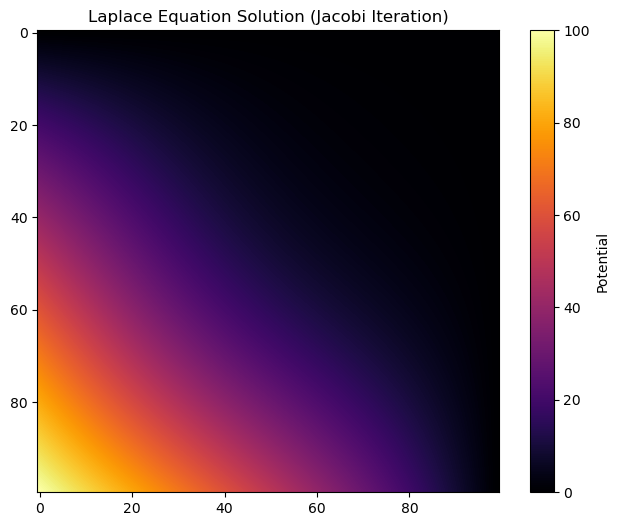

In [20]:
 # project 
import numpy as np
import matplotlib.pyplot as plt

class LaplaceSolver:
    def __init__(self, size=50):
        self.size = size
        self.field = np.full((size, size), 0.5, dtype=float)
        self._setup_boundaries()

    def _setup_boundaries(self):
        self.field[0, :] = 0  
        self.field[:, -1] = 0 
        self.field[:, 0] = np.linspace(0, 100, self.size)
        self.field[-1, :] = np.linspace(100, 0, self.size)
        self.field[-1, 0] = 100.0

    def jacobi_step(self):
    
        # Create a copy to maintain constant boundaries
        new_field = self.field.copy()
        
        # Vectorized update formula:
        # [1:-1, 1:-1] targets only the inner elements (excluding borders)
        new_field[1:-1, 1:-1] = 0.25 * (
            self.field[1:-1, 0:-2] + 
            self.field[1:-1, 2:]   + 
            self.field[2:, 1:-1]   + 
            self.field[0:-2, 1:-1]   
        )
        
        self.field = new_field

    def solve(self, iterations=1000):
        for _ in range(iterations):
            self.jacobi_step()

    def display(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(self.field, cmap='inferno', interpolation='bilinear')
        plt.colorbar(label='Potential')
        plt.title(f"Laplace Equation Solution (Jacobi Iteration)")
        plt.show()

solver = LaplaceSolver(size=100)
solver.solve(iterations=2000)
solver.display()
